In [39]:
import pandas as pd
import glob
#FILES=['./swine_h1n1.csv','./swine_h3n2.csv','./h5n1.csv','./h5n2.csv','./h5n6.csv','./h3n2.csv']

#FILES=glob.glob('predictions/*h[0-9]*csv')
FILES=glob.glob('../results/animal_predictions/*csv')
FILES=glob.glob('../results/animal_predictions/combined_results.csv')

seqf=pd.read_csv(FILES[0])
seqf=seqf.rename(columns={'predicted_emergence_score':'IRATe','predicted_impact_score':'IRATi'})


In [40]:
seqf

,id,subtype,ha_accession,na_accession,ha,na,HA_Avg_Qdist,ha_variance,NA_Avg_Qdist,na_variance,Geometric_Mean,IRATi,IRATe
0,A/swine/Missouri/A02524459/2020,H1N1,EPI1765551,EPI1765552,MKAILVVLLYTFTTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,MNANQRIIAIGTVCMIVGIISLLLQIGNIVSLWISHSIQTGWENHT...,0.014602,0.000009,0.029655,0.000013,0.020809,6.204217,6.343788
1,A/swine/Ohio/A02524448/2020,H1N1,EPI1765553,EPI1765554,MKAVLVVLLYTFTTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,MNTNQRIITIGTVCLIVGIISLLLQIGNIVSLWVSHSIQTRWENHT...,0.019032,0.000012,0.030905,0.000014,0.024253,6.144562,6.276626
2,A/swine/South_Dakota/A02524453/2020,H1N1,EPI1765555,EPI1765556,MKAILVVLLYTFTTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,MNTNQRIITIGTVCMIVGIISLLLQIGNIVSLWISHSIQIEWENHT...,0.015378,0.000012,0.030887,0.000013,0.021794,6.182426,6.321932
3,A/swine/Indiana/A02524458/2020,H1N1,EPI1765559,EPI1765560,MKAVLVVLLYTFTTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,MNTNQRIITIGTVCLIVGIISLLLQIGNIVSLWVSHSIQTRWENHT...,0.019020,0.000012,0.030905,0.000014,0.024245,6.144680,6.276771
4,A/swine/Iowa/A02479424/2020,H1N1,EPI1766606,EPI1766607,MKAVLVVMLYTFTTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,MNTNQRIITIGTVCLIVGIISLLLQIGNIVSLWVSHSIQTRWENHT...,0.016578,0.000012,0.034251,0.000016,0.023829,6.133895,6.274830
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6061,A/chicken/Guangdong/F94/2022,H9N2,EPI2167482,EPI2167484,MKTVSLITILLAATVSNADKICIGYQSTNSTETVDTLTENNVPVTH...,MNPNQKITAIGSVSLIIAIICLLMQIAILTTTMTLHFGQKECSNPL...,0.021926,0.000166,0.073419,0.011472,0.040122,5.718959,5.883612
6062,A/chicken/Guangdong/F99/2022,H9N2,EPI2167503,EPI2167506,MEAVSLITILLAATVSNADKICIGYQSTNSTETVDTLTENNVPVTH...,MNPNQKITAIGSVSLIIAIICLLMQIAILTTTMTLHFRQKECSNPS...,0.018988,0.000092,0.052028,0.014803,0.031431,5.935981,6.089459
6063,A/chicken/Egypt/Menoufia/2021,H9N2,EPI2175832,EPI2175833,MEVIPLMIMLLLVTTNNADKICIGHQSTNSTETVDTLTETGVPVTH...,MNPNQRIIALGSASLTVATICLLIQIAILATTMTLHFKQNEYANTS...,0.055346,0.000136,0.461097,0.015276,0.159750,3.594084,3.700304
6064,A/chicken/South_Korea/SL20/2020,H9N2,EPI2176583,EPI2176585,METVSLITILVVATVSSADKICIGYQSTNSTETVDTLTENNVPVTH...,MNPNQKITAIGSVSLIIAIICLLMQIAILTTTMTFHFGQKECSNPS...,0.029999,0.000109,0.051293,0.014672,0.039227,5.826564,5.956565


In [41]:
def getInfo(term="A/swine/Minnesota/A02711856/2022",variables=None,lookup=False):
    if not lookup:
        print(term)
        if '/' in term:
            return term.split('/')[2]
        if '_' in term:
            return term.split('_')[2]
    from Bio import Entrez
    Entrez.email = "ishanu@uchicago.edu"    
    handle = Entrez.esearch(db="nucleotide", term=term)
    record = Entrez.read(handle)
    Ldict={}
    for ID in record["IdList"]:
        handle = Entrez.efetch(db="nucleotide", id="2289156410", rettype="gb", retmode="json")
        XML=handle.read()
        LINES=[x.strip() for x in XML.split('\n')]
        LINES=[x[1:]+x[0].replace('/','') for x in LINES if '/' in x[:1] and '=' in x]
        Ldict[ID]={x.split('=')[0]:x.split('=')[1] for x in LINES }
    df=pd.DataFrame(Ldict).transpose().drop_duplicates().transpose()   
    if df.empty:
        return term.split('/')[2]
    return df.loc['country'].values[0]    

In [42]:
def getCountry(row):
    #print(row.id)
    return getInfo(row.id)
seqf['country']=seqf.apply(getCountry, axis=1)
seqf.to_csv('seqf.csv')

A/swine/Missouri/A02524459/2020
A/swine/Ohio/A02524448/2020
A/swine/South_Dakota/A02524453/2020
A/swine/Indiana/A02524458/2020
A/swine/Iowa/A02479424/2020
A/swine/Iowa/A02479430/2020
A/swine/Iowa/A02479425/2020
A/swine/South_Dakota/A02524422/2020
A/swine/Iowa/A02524418/2020
A/swine/North_Carolina/A02479439/2020
A/swine/Iowa/A02524421/2020
A/swine/Minnesota/A02245664/2020
A/swine/Iowa/A02524430/2020
A/swine/Indiana/A02524436/2020
A/swine/Indiana/A02524438/2020
A/swine/Iowa/A02524454/2020
A/swine/Iowa/A02245630/2020
A/swine/Minnesota/A02245637/2020
A/swine/Minnesota/A02245633/2020
A/swine/Texas/A02245632/2020
A/swine/Iowa/A02479310/2020
A/swine/Iowa/A02479301/2020
A/swine/Indiana/A02479315/2020
A/swine/Iowa/A02479306/2020
A/swine/Iowa/A02479309/2020
A/swine/Missouri/A02479312/2020
A/swine/Iowa/A02479307/2020
A/swine/Iowa/A02479303/2020
A/swine/Iowa/A02479343/2020
A/swine/Nebraska/A02479337/2020
A/swine/Wisconsin/A02479334/2020
A/swine/Minnesota/A02479345/2020
A/swine/Minnesota/A02479335/

In [43]:
af=pd.read_csv('seqf.csv',index_col=0).reset_index()#.country.value_counts()
cf=pd.DataFrame(af.country.value_counts())
cf.columns=['cnt']
cf.index.name='country'
af=af.join(cf,on='country')
cf=cf.reset_index()
af

,index,id,subtype,ha_accession,na_accession,ha,na,HA_Avg_Qdist,ha_variance,NA_Avg_Qdist,na_variance,Geometric_Mean,IRATi,IRATe,country,cnt
0,0,A/swine/Missouri/A02524459/2020,H1N1,EPI1765551,EPI1765552,MKAILVVLLYTFTTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,MNANQRIIAIGTVCMIVGIISLLLQIGNIVSLWISHSIQTGWENHT...,0.014602,0.000009,0.029655,0.000013,0.020809,6.204217,6.343788,Missouri,96
1,1,A/swine/Ohio/A02524448/2020,H1N1,EPI1765553,EPI1765554,MKAVLVVLLYTFTTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,MNTNQRIITIGTVCLIVGIISLLLQIGNIVSLWVSHSIQTRWENHT...,0.019032,0.000012,0.030905,0.000014,0.024253,6.144562,6.276626,Ohio,71
2,2,A/swine/South_Dakota/A02524453/2020,H1N1,EPI1765555,EPI1765556,MKAILVVLLYTFTTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,MNTNQRIITIGTVCMIVGIISLLLQIGNIVSLWISHSIQIEWENHT...,0.015378,0.000012,0.030887,0.000013,0.021794,6.182426,6.321932,South_Dakota,84
3,3,A/swine/Indiana/A02524458/2020,H1N1,EPI1765559,EPI1765560,MKAVLVVLLYTFTTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,MNTNQRIITIGTVCLIVGIISLLLQIGNIVSLWVSHSIQTRWENHT...,0.019020,0.000012,0.030905,0.000014,0.024245,6.144680,6.276771,Indiana,212
4,4,A/swine/Iowa/A02479424/2020,H1N1,EPI1766606,EPI1766607,MKAVLVVMLYTFTTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,MNTNQRIITIGTVCLIVGIISLLLQIGNIVSLWVSHSIQTRWENHT...,0.016578,0.000012,0.034251,0.000016,0.023829,6.133895,6.274830,Iowa,1013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6061,6061,A/chicken/Guangdong/F94/2022,H9N2,EPI2167482,EPI2167484,MKTVSLITILLAATVSNADKICIGYQSTNSTETVDTLTENNVPVTH...,MNPNQKITAIGSVSLIIAIICLLMQIAILTTTMTLHFGQKECSNPL...,0.021926,0.000166,0.073419,0.011472,0.040122,5.718959,5.883612,Guangdong,24
6062,6062,A/chicken/Guangdong/F99/2022,H9N2,EPI2167503,EPI2167506,MEAVSLITILLAATVSNADKICIGYQSTNSTETVDTLTENNVPVTH...,MNPNQKITAIGSVSLIIAIICLLMQIAILTTTMTLHFRQKECSNPS...,0.018988,0.000092,0.052028,0.014803,0.031431,5.935981,6.089459,Guangdong,24
6063,6063,A/chicken/Egypt/Menoufia/2021,H9N2,EPI2175832,EPI2175833,MEVIPLMIMLLLVTTNNADKICIGHQSTNSTETVDTLTETGVPVTH...,MNPNQRIIALGSASLTVATICLLIQIAILATTMTLHFKQNEYANTS...,0.055346,0.000136,0.461097,0.015276,0.159750,3.594084,3.700304,Egypt,77
6064,6064,A/chicken/South_Korea/SL20/2020,H9N2,EPI2176583,EPI2176585,METVSLITILVVATVSSADKICIGYQSTNSTETVDTLTENNVPVTH...,MNPNQKITAIGSVSLIIAIICLLMQIAILTTTMTFHFGQKECSNPS...,0.029999,0.000109,0.051293,0.014672,0.039227,5.826564,5.956565,South_Korea,23


In [44]:
#cf.loc[22]={'country':'xxx','cnt':20}
#cf

In [45]:
bf=cf.join(pd.read_csv('seqfgeo',index_col=0).set_index('input_string'),on='country')
uf=bf[bf.latitude.isna()].to_csv('newseqf.csv')

In [46]:
! cat seqfgeo

,formatted_address,latitude,longitude,accuracy,google_place_id,type,postcode,input_string,number_of_results,status
0,Denmark,56.26392,9.501785,APPROXIMATE,ChIJ-1-U7rYnS0YRzZLgw9BDh1I,"country,political",,Denmark,1,OK
1,"North Carolina, USA",35.7595731,-79.01929969999999,APPROXIMATE,ChIJgRo4_MQfVIgRGa4i6fUwP60,"administrative_area_level_1,political",,North_Carolina,1,OK
2,"Minnesota, USA",46.729553,-94.6858998,APPROXIMATE,ChIJmwt4YJpbWE0RD6L-EJvJogI,"administrative_area_level_1,political",,Minnesota,1,OK
3,"Kansas, USA",39.011902,-98.4842465,APPROXIMATE,ChIJawF8cXEXo4cRXwk-S6m0wmg,"administrative_area_level_1,political",,Kansas,1,OK
4,"Oklahoma, USA",35.0077519,-97.092877,APPROXIMATE,ChIJnU-ssRE5rIcRSOoKQDPPHF0,"administrative_area_level_1,political",,Oklahoma,1,OK
8,"Texas, USA",31.9685988,-99.9018131,APPROXIMATE,ChIJSTKCCzZwQIYRPN4IGI8c6xY,"administrative_area_level_1,political",,Texas,1,OK
9,Italy,41.87194,12.56738,APPROXIMATE,ChIJA9KNRIL-1BIRb15jJFz1LOI,"country,political",,Italy,1,

In [47]:
# warning! .. running this too many times costs money
#! ./geocode.py -i newseqf.csv -o newseqfgeo -A country

In [48]:
pd.concat([pd.read_csv('seqfgeo',index_col=0),pd.read_csv('newseqfgeo',index_col=0)]).drop_duplicates().to_csv('seqfgeo')

In [49]:
gf=pd.read_csv('seqfgeo',index_col=0)
geof=seqf.join(gf.set_index('input_string'),on='country')
geof=geof[geof.status=='OK']

In [50]:
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
import contextily as ctx
import geopandas
import geoplot as gplt
import pylab as plt
import pandas as pd
import matplotlib.cm as cm
import matplotlib as mpl
import numpy as np
import json


In [51]:
geo_DF=geopandas.GeoDataFrame(
    geof, crs="EPSG:4326",geometry=geopandas.points_from_xy(geof.longitude, geof.latitude))
df=geo_DF.to_crs('epsg:4326')
df_=df.to_crs('epsg:4326')
df__ = df.to_crs(epsg=3857) # reproject it in Web mercator
geo_DF__ = geo_DF.to_crs(epsg=3857) # reproject it in Web mercator

In [52]:
def getColor(x,cmap='jet',VMIN=.5,VMAX=1.0,alpha=None):
    if alpha is None:
        alpha=1
    else:
        alpha = (((x-VMIN)/(VMAX-VMIN)))
    if alpha == 1:
        alpha=.999
    norm = mpl.colors.Normalize(vmin=VMIN, vmax=VMAX)
    m = cm.ScalarMappable(norm=norm, cmap=cmap)
    ctup=np.array(list(m.to_rgba(x)))
    ctup[3]=alpha
    return tuple(ctup)

def getColor(x,cmap='jet',VMIN=.5,VMAX=1.0):
    norm = mpl.colors.Normalize(vmin=VMIN, vmax=VMAX)
    m = cm.ScalarMappable(norm=norm, cmap=cmap)
    return m.to_rgba(x)

def mssize(x):
    return ((3.5**(x-2))) + (x>6.76)*900 + 40
#        return ((4.5**(x-2))) + (x>6.5)*200
def mssize1(x):
    return ((3.25**(x-2))) + (x>7)*900 + 40
#        return ((4.5**(x-2))) + (x>6.5)*200

    


def plotRisk(df,ax,variable='IRATe',ALPHA=.2,COL=None,mssize=mssize,colR=1,colG=.3,colB=.3,colalpha=.2,
             cmap='jet',VMIN=0,VMAX=None,markersize=20,markeredgecolor='w'):
    #df=df.sort_values(variable,ascending=True)
    if VMAX is None:
        VMAX=1
        
   
    #MS = lambda x: ((4.5**(x-2))) 
    MS = lambda x: mssize(x) 
    
    df.plot(
        ax=ax,
        markersize=markersize* MS(df[variable]),
        edgecolor=markeredgecolor,lw=.5,
        color=(colR,colG,colB,colalpha),#'k',#getColor(df[variable],cmap=cmap,VMIN=VMIN,VMAX=VMAX),
        #alpha=ALPHA
    )
    #fraction=.025
    #norm = mpl.colors.Normalize(vmin=VMIN, vmax=VMAX)
    #cax = ax.inset_axes([.4, 0.1, 0.3, 0.025])
    #cbar = ax.figure.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),orientation='horizontal',
    #        ax=ax, cax=cax,pad=.0, fraction=fraction)
    #cbar.ax.set_title('estimated IRAT emergence score',fontsize=20,color='k')
    #cbar.ax.tick_params(labelsize=20,labelcolor='k')
    
    return ax    

def saveFIG(filename='tmp.pdf'):
    import pylab as plt
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.savefig(filename,dpi=300, bbox_inches = 'tight',pad_inches = 0,transparent=True) 
    return

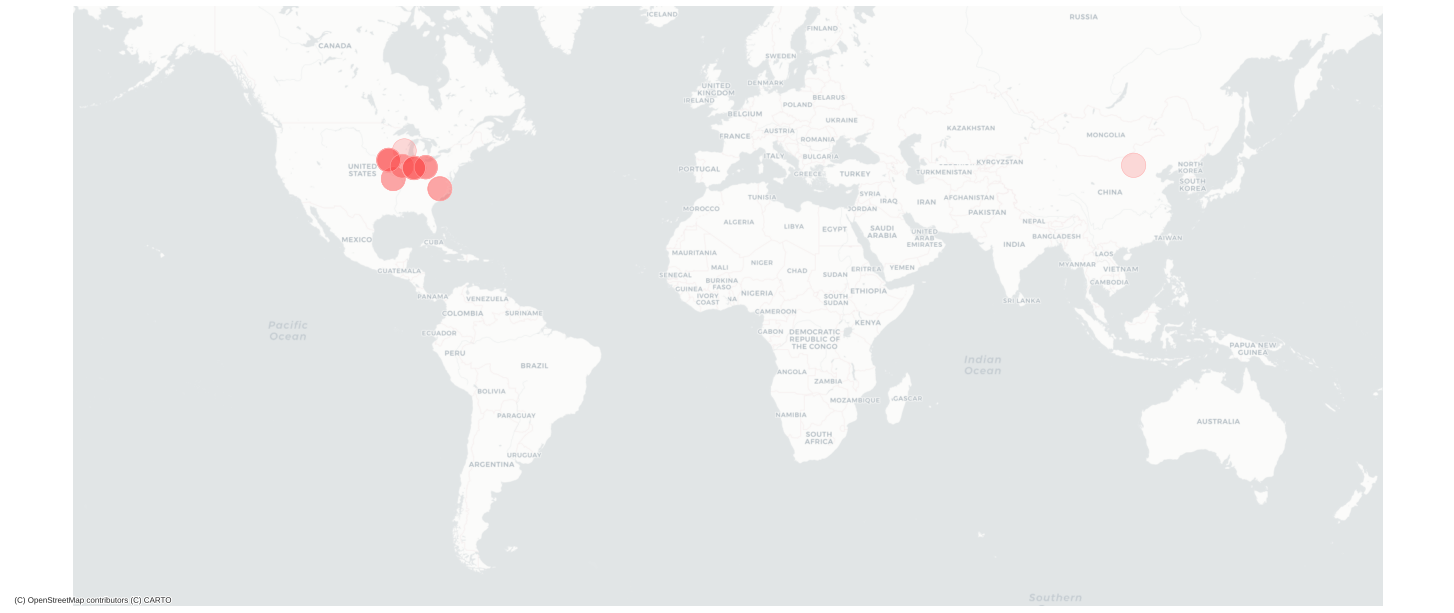

In [53]:
from matplotlib import cm
cmap = cm.gist_rainbow
cmap = cm.gray
#import 
fname1='./WB_Coastlines_10m/WB_Coastlines_10m.shp'
df1 = geopandas.read_file(fname1)
plt.style.use('dark_background')
plt.style.use('seaborn-whitegrid')
df1__ = df1.to_crs(epsg=3857) # reproject it in Web mercator
ax1 = df1__.plot(figsize=(20,20), alpha=.05, edgecolor='w')
variable='IRATi'
#cmap='gnuplot2'
#cmap='viridis'
#cmap=plt.get_cmap('cool')
VMIN=geo_DF__.IRATe.min()
VMAX=geo_DF__.IRATe.max()

geo_DF___=geo_DF__[geo_DF__.IRATe>6.7]
geo_DF____=geo_DF__[geo_DF__.IRATe<=6.7]


ALPHA=1
#plotRisk(geo_DF____,ax=ax1,cmap=cmap,markersize=.4,ALPHA=ALPHA,
#         markeredgecolor='#ffaaaa',VMIN=geo_DF__.IRATe.min(),
#         VMAX=geo_DF__.IRATe.max())
#plotRisk(geo_DF___,ax=ax1,cmap=cmap,markersize=1.5,ALPHA=ALPHA,
#         markeredgecolor='#ffaaaa',variable='IRATe',VMIN=geo_DF__.IRATe.min(),
#         VMAX=geo_DF__.IRATe.max())
plotRisk(geo_DF___,ax=ax1,cmap=cmap,markersize=1.5,ALPHA=ALPHA,
         markeredgecolor='#ffaaaa',variable='IRATi',VMIN=geo_DF__.IRATi.min(),
         VMAX=geo_DF__.IRATi.max())


#ctx.add_basemap(ax1,source=ctx.providers.Stamen.TonerLite,alpha=1)
ctx.add_basemap(ax1,source=ctx.providers.CartoDB.Positron,alpha=.7)
#ctx.add_basemap(ax1,source=ctx.providers.Stamen.Toner)
#ctx.add_basemap(ax1,source=ctx.providers.Stamen.Watercolor,alpha=.5)
#ctx.add_basemap(ax1,source=ctx.providers.NASAGIBS.ViirsEarthAtNight2012,alpha=1)
#ax1.set_ylim(-.92e7,None)
ax1.set_ylim(-.85e7,.985e7)
ax1.set_axis_off()
#saveFIG(filename='bionorad_black.png')
saveFIG(filename='../../tex/overleaf/Figures/bionorad_wcol.png')

In [54]:
geo_DF__.columns

Index(['id', 'subtype', 'ha_accession', 'na_accession', 'ha', 'na',
       'HA_Avg_Qdist', 'ha_variance', 'NA_Avg_Qdist', 'na_variance',
       'Geometric_Mean', 'IRATi', 'IRATe', 'country', 'formatted_address',
       'latitude', 'longitude', 'accuracy', 'google_place_id', 'type',
       'postcode', 'number_of_results', 'status', 'geometry'],
      dtype='object')

In [55]:
xf=geo_DF[['id','IRATi', 'IRATe', 'subtype', 'country']]
xf=xf.set_index('id')
xf

,IRATi,IRATe,subtype,country
id,,,,
A/swine/Missouri/A02524459/2020,6.204217,6.343788,H1N1,Missouri
A/swine/Ohio/A02524448/2020,6.144562,6.276626,H1N1,Ohio
A/swine/South_Dakota/A02524453/2020,6.182426,6.321932,H1N1,South_Dakota
A/swine/Indiana/A02524458/2020,6.144680,6.276771,H1N1,Indiana
A/swine/Iowa/A02479424/2020,6.133895,6.274830,H1N1,Iowa
...,...,...,...,...
A/chicken/Guangdong/F94/2022,5.718959,5.883612,H9N2,Guangdong
A/chicken/Guangdong/F99/2022,5.935981,6.089459,H9N2,Guangdong
A/chicken/Egypt/Menoufia/2021,3.594084,3.700304,H9N2,Egypt


In [56]:
iMAX=6.5
eMAX=6.5
mf=xf[(xf.IRATe > eMAX) | (xf.IRATi > iMAX)]
mf.sort_values('IRATe').tail(50)

,IRATi,IRATe,subtype,country
id,,,,
A/swine/Indiana/A02479102/2020,6.559520,6.685400,H1N1,Indiana
A/swine/Indiana/A01812310/2020,6.559520,6.685400,H1N1,Indiana
A/swine/North_Carolina/A02524694/2020,6.559520,6.685400,H1N1,North_Carolina
A/swine/Ohio/A02479097/2020,6.559520,6.685400,H1N1,Ohio
A/swine/Missouri/A02479079/2020,6.559520,6.685400,H1N1,Missouri
A/swine/Ohio/A02479043/2020,6.559520,6.685400,H1N1,Ohio
A/swine/South_Dakota/A02524617/2020,6.562861,6.687674,H1N1,South_Dakota
A/swine/Iowa/A02524554/2020,6.563261,6.688236,H1N1,Iowa
A/swine/Nebraska/A02245425/2020,6.564363,6.689645,H1N1,Nebraska


In [57]:
mf.sort_values('IRATi').tail(50)

,IRATi,IRATe,subtype,country
id,,,,
A/swine/Missouri/A02479157/2020,6.654230,6.761215,H1N1,Missouri
A/swine/Wisconsin/A02479131/2020,6.654232,6.761247,H1N1,Wisconsin
A/swine/Missouri/A02524711/2020,6.654235,6.761297,H1N1,Missouri
A/swine/Iowa/A02524671/2020,6.654600,6.754453,H1N1,Iowa
A/swine/Iowa/A02479224/2020,6.656082,6.748980,H1N1,Iowa
A/Chicken/Guangdong/211064-3/2021(H5N6),6.656179,5.505556,H5N6,Guangdong
A/Chicken/Guangdong/211064-5/2021(H5N6),6.656179,5.505556,H5N6,Guangdong
A/Chicken/Guangdong/211064-4/2021(H5N6),6.656179,5.505556,H5N6,Guangdong
A/Chicken/Guangdong/211064-1/2021(H5N6),6.656179,5.505556,H5N6,Guangdong


In [67]:
pf_=geo_DF__.copy()
pf_['xscore']=np.sqrt(geo_DF__.IRATe*geo_DF__.IRATi)
pf__=pf_.copy()
F=5
def perturb_coord1(row):
    return row.latitude+F*np.random.rand()
def perturb_coord2(row):
    return row.longitude+F*np.random.rand()
pf_['latitude']=pf_.apply(perturb_coord1,axis=1)
pf_['longitude']=pf_.apply(perturb_coord2,axis=1)
pf_=pf_[['id','IRATi','IRATe','xscore','country','latitude','longitude','subtype']]
pf_=geopandas.GeoDataFrame(
    pf_, crs="EPSG:4326",geometry=geopandas.points_from_xy(pf_.longitude, pf_.latitude)).to_crs(epsg=3857)

In [68]:
NUM=50

In [69]:
pf=pf_.sort_values('xscore',ascending=False).head(NUM)
pf1=pf_.sort_values('xscore',ascending=False).tail(pf_.index.size-NUM)
pf1=pf__.set_index('id').loc[pf1.id]

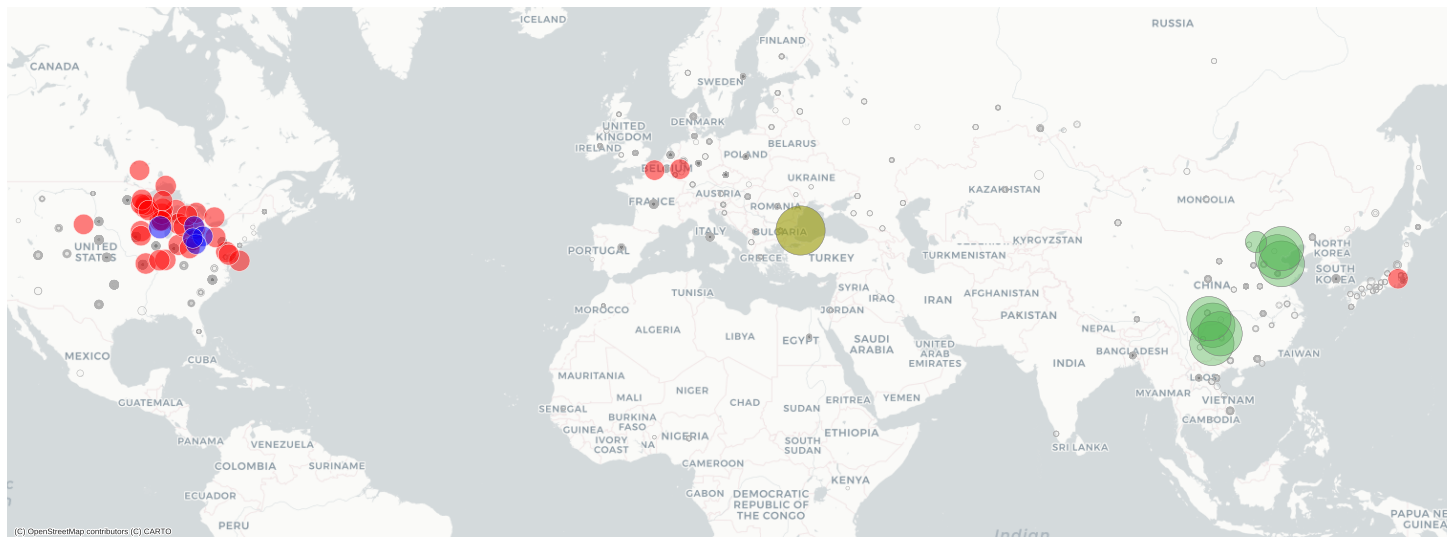

In [104]:
cmap = cm.gist_rainbow
cmap = cm.gray
TVAR='xscore'

fname1='./WB_Coastlines_10m/WB_Coastlines_10m.shp'
df1 = geopandas.read_file(fname1)
plt.style.use('dark_background')
plt.style.use('seaborn-whitegrid')
df1__ = df1.to_crs(epsg=3857) # reproject it in Web mercator
ax1 = df1__.plot(figsize=(20,20), alpha=.05, edgecolor='w')
VMIN=pf[TVAR].min()
VMAX=pf[TVAR].max()

ALPHA=1
plotRisk(pf1,ax=ax1,cmap=cmap,markersize=.3,ALPHA=ALPHA,mssize=mssize1,
         markeredgecolor='.7',variable=TVAR,VMIN=VMIN,colalpha=.01,colR=.5,colG=0.5,colB=0.5,
         VMAX=VMAX)

plotRisk(pf[pf.subtype=='H1N1'],ax=ax1,cmap=cmap,markersize=1.5,ALPHA=ALPHA,mssize=mssize1,
         markeredgecolor='#ffeeee',variable=TVAR,VMIN=VMIN,colalpha=.5,colR=1,colG=0,colB=0,
         VMAX=VMAX)

plotRisk(pf[pf.subtype=='H7N9'],ax=ax1,cmap=cmap,markersize=1.5,ALPHA=ALPHA,mssize=mssize1,
         markeredgecolor='#777777',variable=TVAR,VMIN=VMIN,colalpha=.4,colR=0.3,colG=.7,colB=0.3,
         VMAX=VMAX)

plotRisk(pf[pf.subtype=='H3N2'],ax=ax1,cmap=cmap,markersize=1.5,ALPHA=ALPHA,mssize=mssize1,
         markeredgecolor='#ffeeee',variable=TVAR,VMIN=VMIN,colalpha=.5,colR=0,colG=0,colB=1,
         VMAX=VMAX)

plotRisk(pf[pf.subtype=='H5N2'],ax=ax1,cmap=cmap,markersize=1.5,ALPHA=ALPHA,mssize=mssize1,
         markeredgecolor='#777777',variable=TVAR,VMIN=VMIN,colalpha=.6,colR=0.6,colG=.6,colB=0,
         VMAX=VMAX)



#ctx.add_basemap(ax1,source=ctx.providers.Stamen.TonerLite,alpha=1)
ctx.add_basemap(ax1,source=ctx.providers.CartoDB.Positron,alpha=1)
#ctx.add_basemap(ax1,source=ctx.providers.Stamen.Toner)
#ctx.add_basemap(ax1,source=ctx.providers.Stamen.Watercolor,alpha=.5)
#ctx.add_basemap(ax1,source=ctx.providers.NASAGIBS.ViirsEarthAtNight2012,alpha=1)
#ax1.set_ylim(-.85e7,.985e7)
ax1.set_ylim(-.1e7,.985e7)
ax1.set_xlim(-1.3e7,1.65e7)
ax1.set_axis_off()
saveFIG(filename='../../tex/overleaf/Figures/bionorad.pdf')

In [71]:
pf.subtype.value_counts()

H1N1    36
H7N9     8
H3N2     5
H5N2     1
Name: subtype, dtype: int64

In [113]:
pf.sort_values('IRATi',ascending=False)#[pf.subtype=='h7']

,id,IRATi,IRATe,xscore,country,latitude,longitude,subtype,geometry
4160,A/chicken/Bulgaria/221_20VIR1725-1/2020,8.820983,6.428702,7.530436,Bulgaria,42.817584,29.166439,H5N2,POINT (3246793.124 5284247.363)
2218,A/swine/Iowa/A02636023/2021,8.054135,5.841935,6.859427,Iowa,43.182996,-88.649530,H3N2,POINT (-9868420.593 5339867.265)
5722,A/Chicken/Hebei/1011/2021,7.723600,6.695683,7.191299,Hebei,38.078469,117.743635,H7N9,POINT (13107161.542 4590516.785)
5723,A/Chicken/Shanxi/1012/2021,7.534718,6.534361,7.016734,Shanxi,39.093995,116.982983,H7N9,POINT (13022486.052 4735144.520)
5716,A/Chicken/Yunnan/1001/2021,7.534598,6.540486,7.019967,Yunnan,28.674528,105.084207,H7N9,POINT (11697920.455 3334285.569)
5717,A/Chicken/Yunnan/1002/2021,7.530594,6.537056,7.016261,Yunnan,25.698655,104.914051,H7N9,POINT (11678978.692 2961805.686)
5719,A/Chicken/Yunnan/1004/2021,7.529632,6.536232,7.015370,Yunnan,27.289687,106.426913,H7N9,POINT (11847389.746 3159711.181)
5718,A/Chicken/Yunnan/1003/2021,7.529556,6.536089,7.015258,Yunnan,29.733819,104.375701,H7N9,POINT (11619049.883 3469380.503)
5721,A/Chicken/Hebei/1009/2020,7.514121,6.525770,7.002530,Hebei,40.268395,117.720189,H7N9,POINT (13104551.468 4905021.713)
5814,A/Camel/Inner_Mongolia/XL/2020,6.689195,6.769213,6.729085,Inner_Mongolia,41.196720,113.041955,H7N9,POINT (12583772.908 5041401.329)


In [ ]:
pf1.sort_values('xscore').xscore

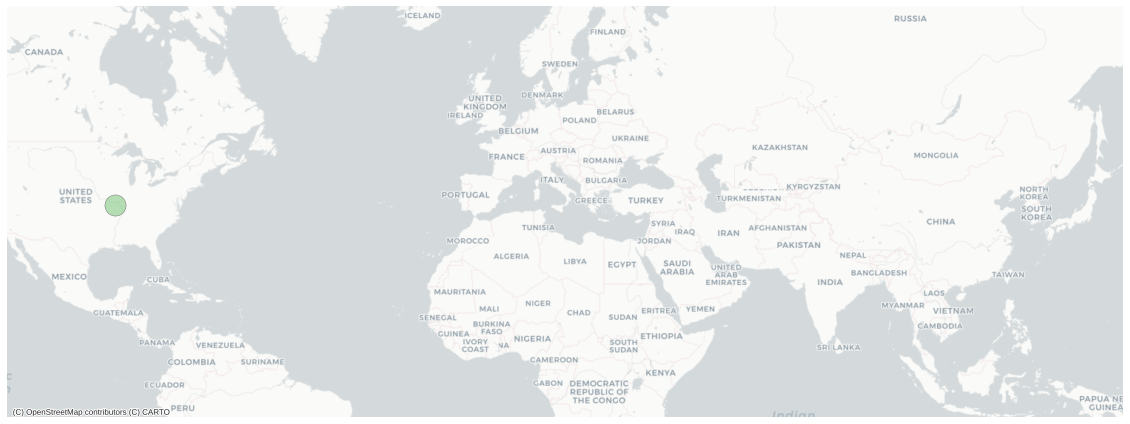

In [112]:
cmap = cm.gist_rainbow
cmap = cm.gray
TVAR='xscore'

fname1='./WB_Coastlines_10m/WB_Coastlines_10m.shp'
df1 = geopandas.read_file(fname1)
plt.style.use('dark_background')
plt.style.use('seaborn-whitegrid')
df1__ = df1.to_crs(epsg=3857) # reproject it in Web mercator
ax1 = df1__.plot(figsize=(20,20), alpha=.05, edgecolor='w')
VMIN=pf[TVAR].min()
VMAX=pf[TVAR].max()

ALPHA=1
#A/Chicken/Hebei/1011/2021	
plotRisk(pf[pf.id=='A/swine/Missouri/A02524711/2020'],ax=ax1,cmap=cmap,markersize=1.5,ALPHA=ALPHA,mssize=mssize1,
         markeredgecolor='#777777',variable=TVAR,VMIN=VMIN,colalpha=.4,colR=0.3,colG=.7,colB=0.3,
         VMAX=VMAX)



#ctx.add_basemap(ax1,source=ctx.providers.Stamen.TonerLite,alpha=1)
ctx.add_basemap(ax1,source=ctx.providers.CartoDB.Positron,alpha=1)
#ctx.add_basemap(ax1,source=ctx.providers.Stamen.Toner)
#ctx.add_basemap(ax1,source=ctx.providers.Stamen.Watercolor,alpha=.5)
#ctx.add_basemap(ax1,source=ctx.providers.NASAGIBS.ViirsEarthAtNight2012,alpha=1)
#ax1.set_ylim(-.85e7,.985e7)
ax1.set_ylim(-.1e7,.985e7)
ax1.set_xlim(-1.3e7,1.65e7)
ax1.set_axis_off()